<a href="https://colab.research.google.com/github/AnthoMant/Creuse-Movie-Project/blob/Etude-diverse/Evolution_de_l'age_moyen_homme_femme_dans_le_temps_Projet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
from sklearn.linear_model import LinearRegression

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
global_title_actor=pd.read_csv('/content/drive/MyDrive/CREUSE MOVIE PROJECT/Base de donnée/globaltitleactor.csv')#Récupération de mon DataSet

In [ ]:
global_title_actress=global_title_actor[(global_title_actor["titleType"]=="movie") & (global_title_actor["primaryProfession"].str.contains("actress"))]#Création de la dataset actrice

In [ ]:
global_title_actor=global_title_actor[(global_title_actor["titleType"]=="movie") & (global_title_actor["primaryProfession"].str.contains("actor"))]#Création de la dataset acteur

In [ ]:
age_actress=global_title_actress.pivot_table(values = "Age" , index = "startYear", aggfunc="mean")#Pivot table pour calculer la moyenne d'age par année

In [ ]:
age_actor=global_title_actor.pivot_table(values = "Age" , index = "startYear", aggfunc="mean")#Pivot table pour calculer la moyenne d'age par année

In [ ]:
age_actress["startYear"]=age_actress.index#Création d'une colonne avec l'index

In [ ]:
age_actor["startYear"]=age_actor.index#Création d'une colonne avec l'index

In [ ]:
age_actor["Age_M"]=age_actor["Age"]#Changement de nom pour la colonne Age

In [ ]:
age_actor["Age_F"]=age_actress["Age"]#Ajout de la colonne Age des femmes

In [ ]:
age_actor.drop("Age", axis=1, inplace=True)#Supression de la colonne Age 

In [ ]:
age_actor=age_actor.fillna(method='ffill')#Remplacement des Nan par la valeur la plus proche

In [ ]:
age_actor

,startYear,Age_M,Age_F
startYear,,,
1906,1906,26.333333,27.500000
1907,1907,42.000000,27.500000
1910,1910,35.500000,31.800000
1911,1911,36.777778,35.888889
1912,1912,34.904762,27.950000
...,...,...,...
2017,2017,42.202975,36.959416
2018,2018,41.996570,37.357388
2019,2019,41.995876,37.520433


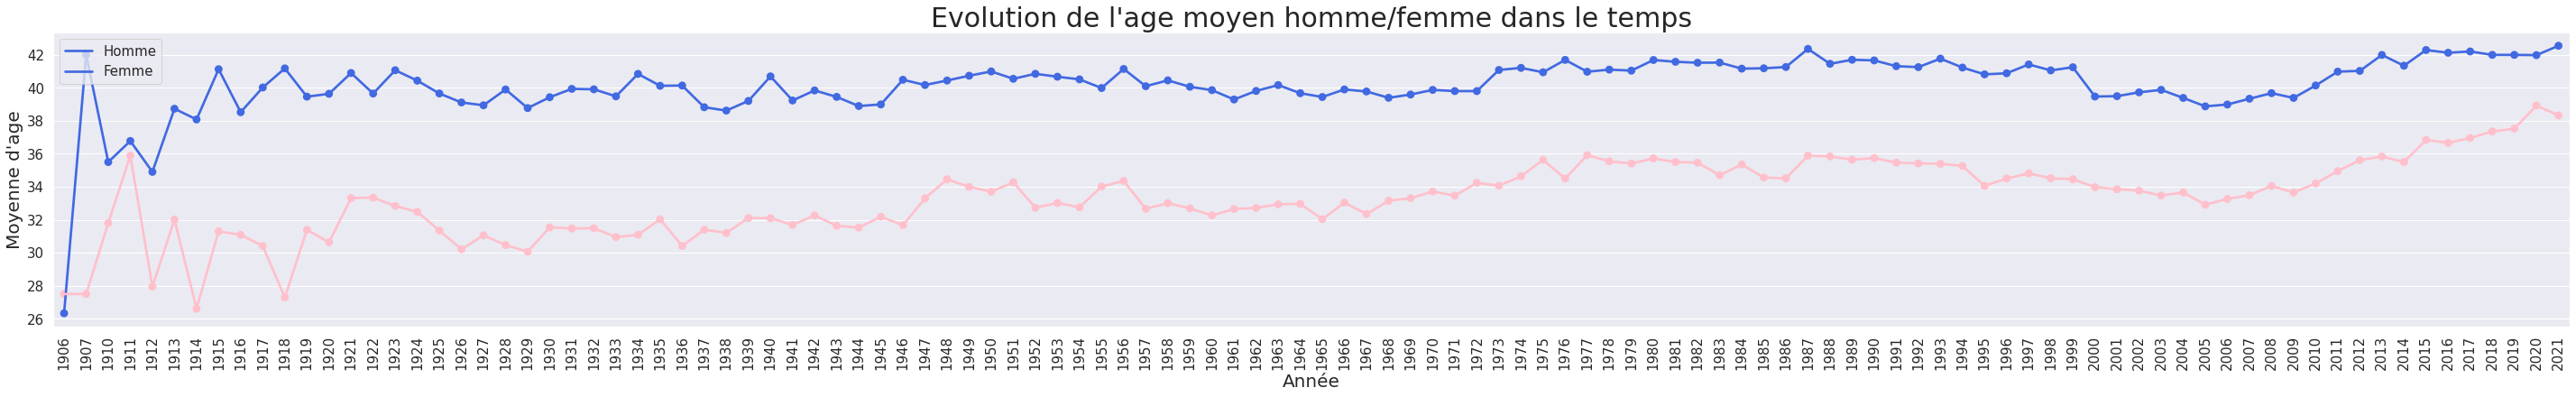

In [ ]:
#Création du pointplot

sns.set_context("notebook", rc={"xtick.labelsize":15, "ytick.labelsize": 15})
plt.figure(figsize=[50,6])
plt.subplot(111)
sns.pointplot(data=age_actor, x="startYear" , y="Age_M", color="royalblue")
sns.pointplot(data=age_actor,x="startYear" , y="Age_F", color="pink")
plt.title("Evolution de l'age moyen homme/femme dans le temps", fontsize=30)#Titre
plt.xticks(rotation=90)
plt.xlabel("Année", fontsize=20)#Titre de l'axe X
plt.ylabel("Moyenne d'age", fontsize=20)#Titre de l'axe Y
plt.legend(["Homme","Femme"],loc="upper left" , fontsize=15)#Legende

plt.show()